2/2 [==============================] - 0s 6ms/step
Epoch 0, Discriminator loss: 1.586008369922638, Generator loss: 0.3908746838569641
1/1 [==============================] - 0s 63ms/step


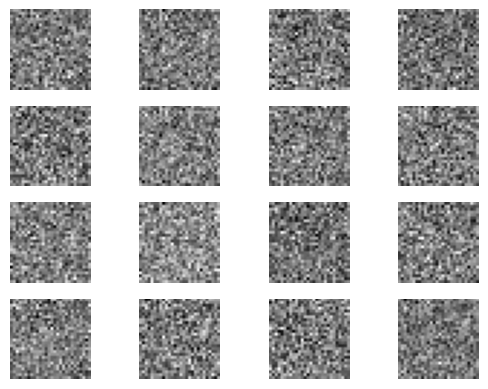

2/2 [==============================] - 0s 6ms/step
Epoch 100, Discriminator loss: 0.06410338170826435, Generator loss: 3.6138153076171875
1/1 [==============================] - 0s 20ms/step


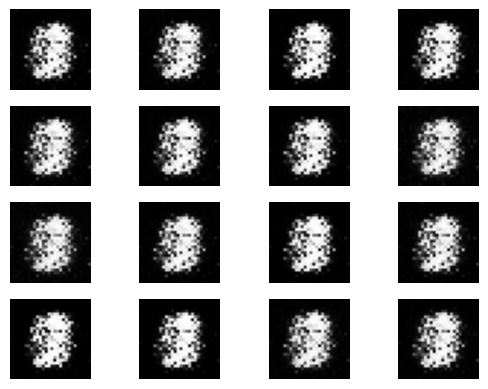

2/2 [==============================] - 0s 5ms/step
Epoch 200, Discriminator loss: 0.01666653621941805, Generator loss: 4.9105730056762695
1/1 [==============================] - 0s 21ms/step


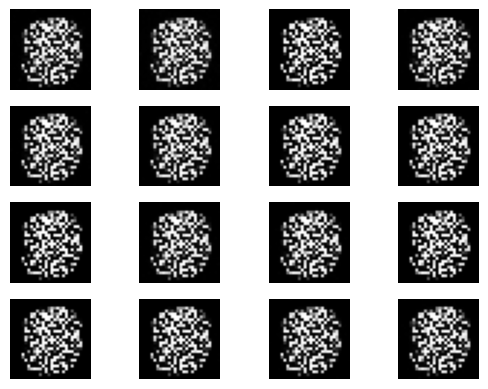

2/2 [==============================] - 0s 5ms/step
Epoch 300, Discriminator loss: 0.014364877250045538, Generator loss: 5.03994083404541
1/1 [==============================] - 0s 23ms/step


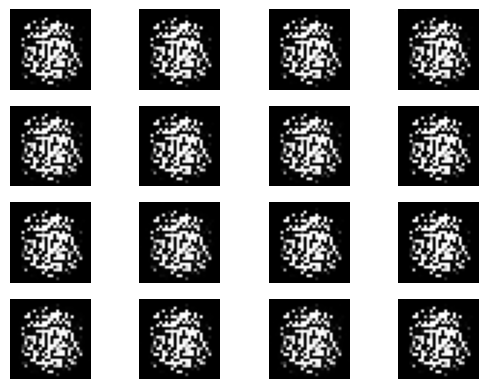

2/2 [==============================] - 0s 5ms/step
Epoch 400, Discriminator loss: 0.006350194104015827, Generator loss: 6.302038192749023
1/1 [==============================] - 0s 22ms/step


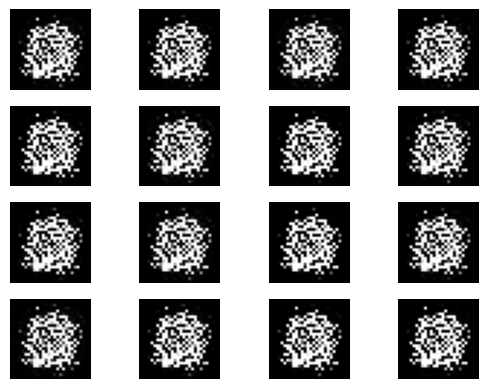

2/2 [==============================] - 0s 5ms/step
Epoch 500, Discriminator loss: 0.0059351210948079824, Generator loss: 8.198554039001465
1/1 [==============================] - 0s 21ms/step


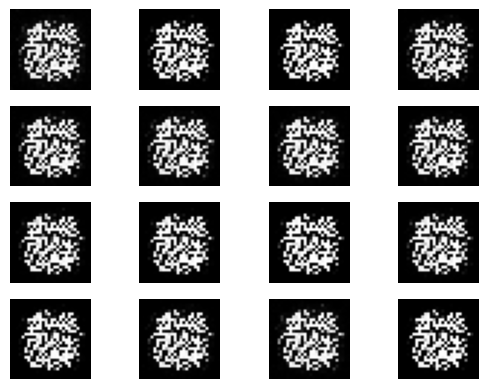

2/2 [==============================] - 0s 6ms/step
Epoch 600, Discriminator loss: 0.008618332329206169, Generator loss: 7.534336090087891
1/1 [==============================] - 0s 24ms/step


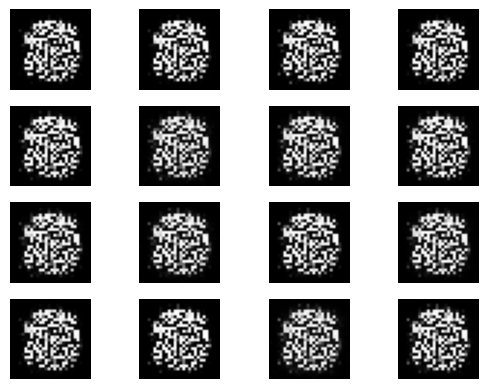

2/2 [==============================] - 0s 15ms/step
Epoch 700, Discriminator loss: 0.0026133907958865166, Generator loss: 7.161296367645264
1/1 [==============================] - 0s 47ms/step


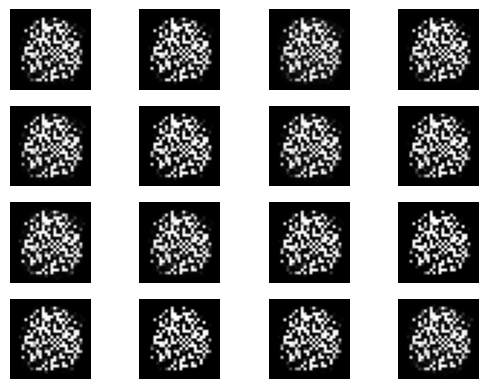

2/2 [==============================] - 0s 5ms/step
Epoch 800, Discriminator loss: 0.00773023976944387, Generator loss: 9.067173957824707
1/1 [==============================] - 0s 21ms/step


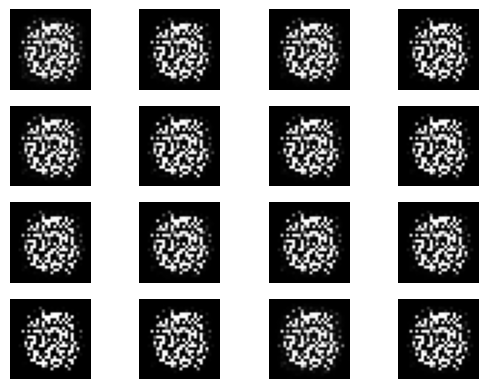

2/2 [==============================] - 0s 5ms/step
Epoch 900, Discriminator loss: 0.062146314419806004, Generator loss: 19.422863006591797
1/1 [==============================] - 0s 20ms/step


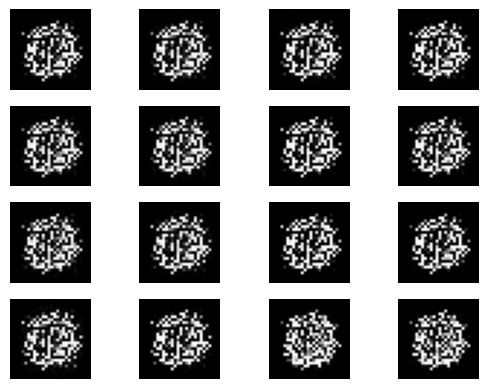

2/2 [==============================] - 0s 9ms/step
Epoch 1000, Discriminator loss: 0.0095992311835289, Generator loss: 9.590507507324219
1/1 [==============================] - 0s 22ms/step


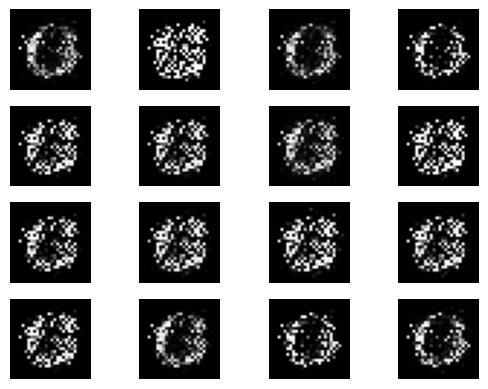

2/2 [==============================] - 0s 5ms/step
Epoch 1100, Discriminator loss: 0.01117823738604784, Generator loss: 5.708487510681152
1/1 [==============================] - 0s 22ms/step


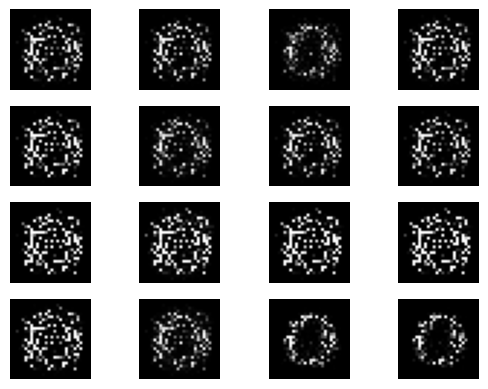

2/2 [==============================] - 0s 11ms/step


In [ ]:
#import libraries
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

#define generator model
def build_generator(latent_dim):
  model = tf.keras.Sequential()
  model.add(layers.Dense(128, input_dim=latent_dim, activation='relu'))
  model.add(layers.Dense(784, activation='sigmoid'))
  model.add(layers.Reshape((28, 28, 1)))
  return model

#define discrimator
def build_discriminator(img_shape):
  model = tf.keras.Sequential()
  model.add(layers.Flatten(input_shape=img_shape))
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(1, activation='sigmoid'))
  return model

 #define the gan model by combining generator and discriminator
def build_gan(generator, discriminator):
  discriminator.trainable = False

  model = tf.keras.Sequential()
  model.add(generator)
  model.add(discriminator)
  return model

 #load MNIST dataset
(x_train , _), ( _ , _) = tf.keras.datasets.mnist.load_data()
x_train= x_train/ 255.0

#reshape images
x_train= x_train.reshape((x_train.shape[0],28, 28, 1))
#build and compile the discriminator
discriminator = build_discriminator((28,28,1))
discriminator.compile(optimizer='adam', loss= 'binary_crossentropy', metrics=['accuracy'])
#build and compile the generator
latent_dim = 100
generator =  build_generator(latent_dim)

#build and compile the gan model
discriminator.trainable = False
gan = build_gan(generator, discriminator)
gan.compile(optimizer='adam' , loss='binary_crossentropy')

#training the gan
epochs = 10000
batch_size = 64

for epoch in range(epochs):
  noise = np.random.normal(0, 1, size=(batch_size, latent_dim))

  #generate fake images using the generator
  generated_images = generator.predict(noise)

  #select a random batch of real images from the dataset
  idx = np.random.randint(0, x_train.shape[0], batch_size)
  real_images = x_train[idx]

  #create labels for the generated and real images
  labels_real = np.ones((batch_size, 1))
  labels_fake = np.zeros((batch_size,1))

  #train the discriminator on real and fake images
  d_loss_real = discriminator.train_on_batch(real_images, labels_real)
  d_loss_fake = discriminator.train_on_batch(generated_images, labels_fake)

  #calculate the total discriminator loss
  d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

  #train the generator by fooling the discriminator
  noise = np.random.normal(0, 1, size=(batch_size, latent_dim))
  labels_gan = np.ones((batch_size, 1))
  g_loss = gan.train_on_batch(noise, labels_gan)

  #print progress and save generated images at certain intervals
  if epoch % 100 == 0:
    print(f"Epoch {epoch}, Discriminator loss: {d_loss[0]}, Generator loss: {g_loss}")
    #save generated images
    gen_imgs = generator.predict(np.random.normal(0, 1, size=(16, latent_dim)))
    gen_imgs = 0.5 * gen_imgs + 0.5
    fig, axs = plt.subplots(4,4)
    count = 0;
    for i in range (4):
      for j in range(4):
        axs[i,j].imshow(gen_imgs[count, :, :, 0], cmap='gray')
        axs[i,j].axis('off')
        count+= 1
    plt.show()